In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline


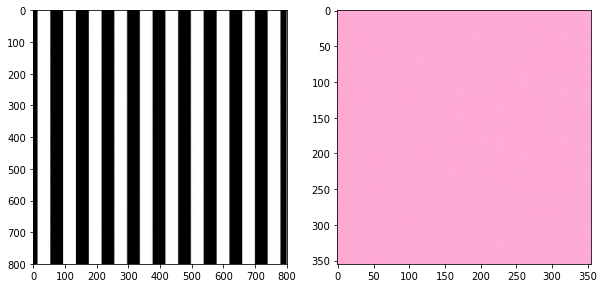

In [2]:
data_root = '../data/1_2/images/'
image_stripes = cv2.imread(data_root + 'stripes.jpg')
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

image_solid = cv2.imread(data_root + 'pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image_stripes)
ax2.imshow(image_solid)


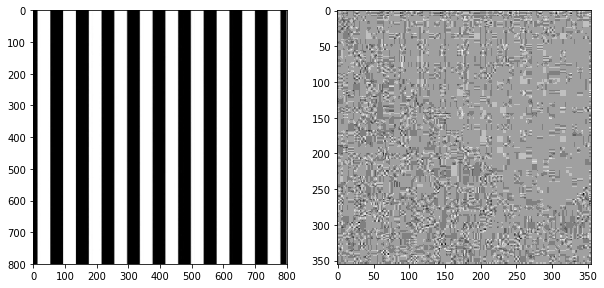

In [5]:
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(gray_stripes, cmap='gray')
ax2.imshow(gray_solid, cmap='gray')

In [6]:
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid / 255.0

def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx
    

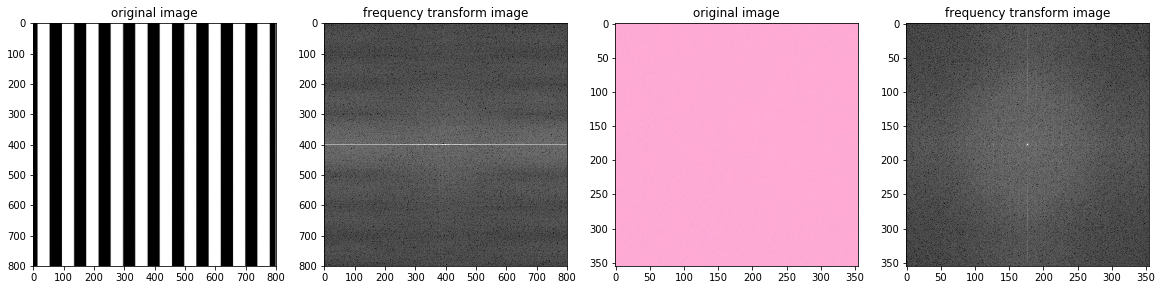

In [8]:
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')

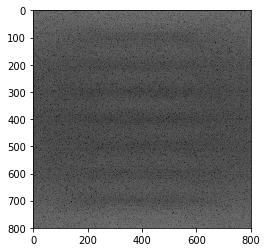

In [33]:
f = np.fft.fft2(norm_stripes)
f = 20 * np.log(np.abs(f))

plt.imshow(f, cmap='gray')

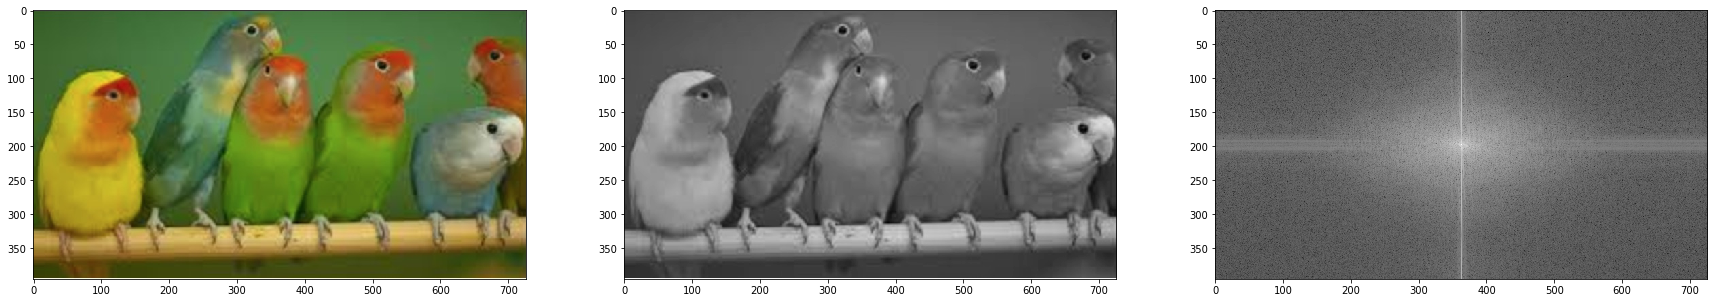

In [38]:
image = cv2.imread(data_root + 'birds.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
norm_image = gray / 255.0
f_image = ft_image(norm_image)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.imshow(image)
ax2.imshow(gray, cmap='gray')
ax3.imshow(f_image, cmap='gray')

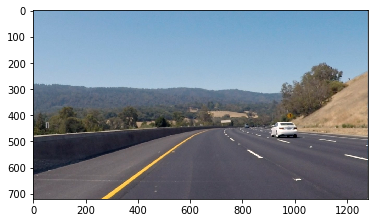

In [40]:
image = mpimg.imread(data_root + 'curved_lane.jpg')
plt.imshow(image)

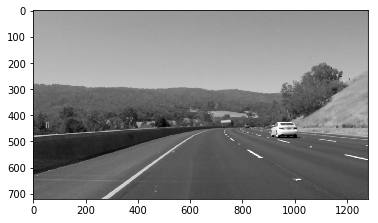

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

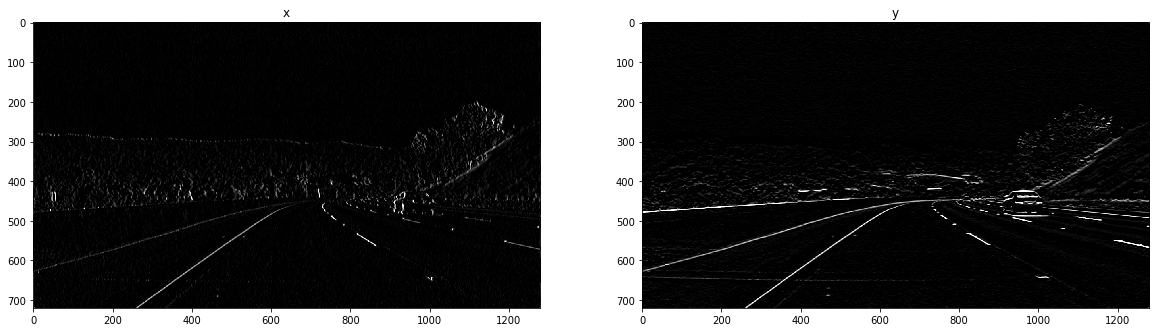

In [44]:
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('x')
ax1.imshow(filtered_image_x, cmap='gray')
ax2.set_title('y')
ax2.imshow(filtered_image_y, cmap='gray')

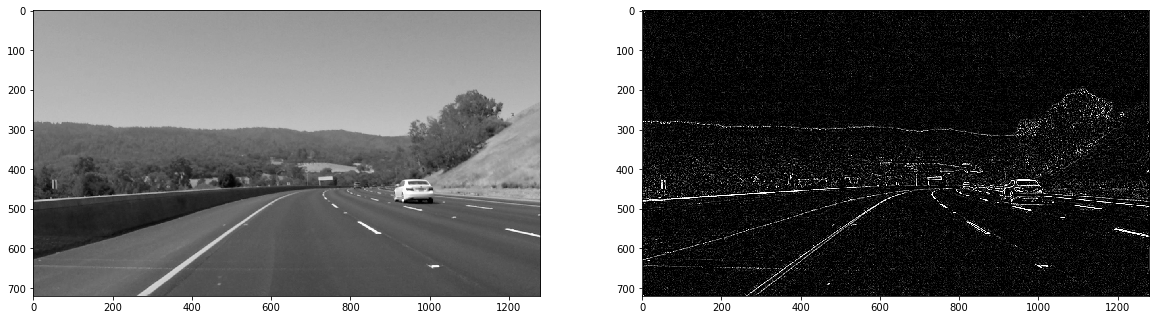

In [48]:
filter_decimal = np.array([[0, -10, 0],
                          [-10, 40, -10],
                          [0, -10, 0]])
filtered_image = cv2.filter2D(gray, -1, filter_decimal)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(gray, cmap='gray')
ax2.imshow(filtered_image, cmap='gray')

In [59]:
filter_gaussianX = cv2.getGaussianKernel(5, 1)
filter_gaussianY = cv2.getGaussianKernel(5, 1)
filter_gaussian = filter_gaussianX * filter_gaussianY.T
print(filter_gaussianY.sum())

0.9999999999999999


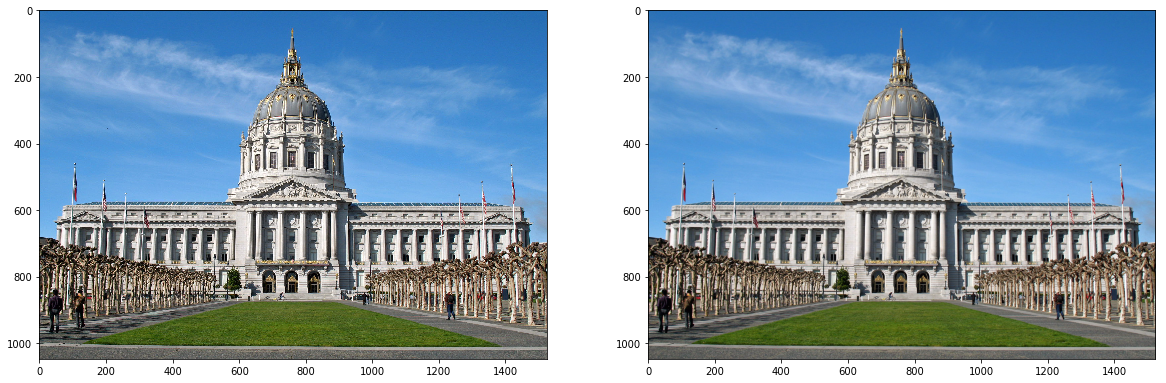

In [62]:
image = mpimg.imread(data_root + 'city_hall.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

filtered_image = cv2.filter2D(image, -1, filter_gaussian)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(image)
ax2.imshow(filtered_image)


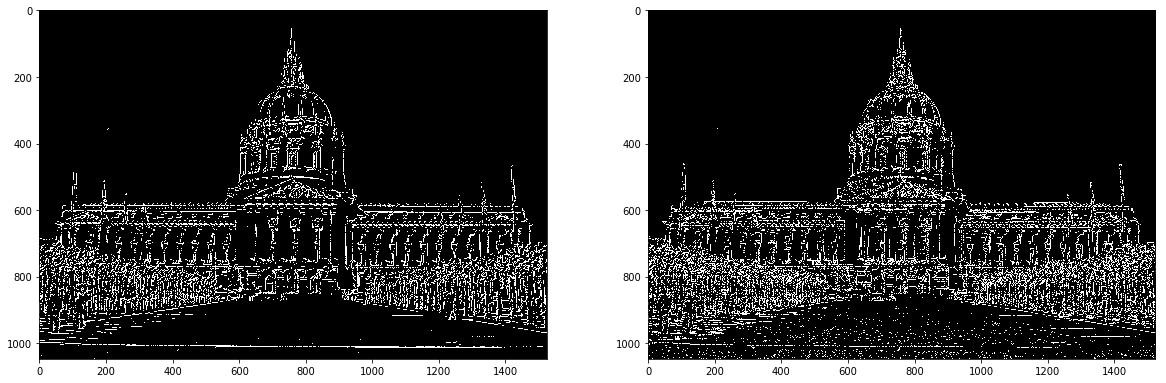

In [73]:
gray = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2GRAY)
gray_n_blur = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

edge_find_x = cv2.filter2D(gray, -1, sobel_x)
edge_find_y = cv2.filter2D(gray, -1, sobel_y)
edge_find = edge_find_x + edge_find_y

retval, binary_image = cv2.threshold(edge_find, 100, 255, cv2.THRESH_BINARY)
ax1.imshow(binary_image, cmap='gray')

edge_find_x = cv2.filter2D(gray_n_blur, -1, sobel_x)
edge_find_y = cv2.filter2D(gray_n_blur, -1, sobel_y)
edge_find = edge_find_x + edge_find_y
retval, binary_image = cv2.threshold(edge_find, 100, 255, cv2.THRESH_BINARY)
ax2.imshow(binary_image, cmap='gray')

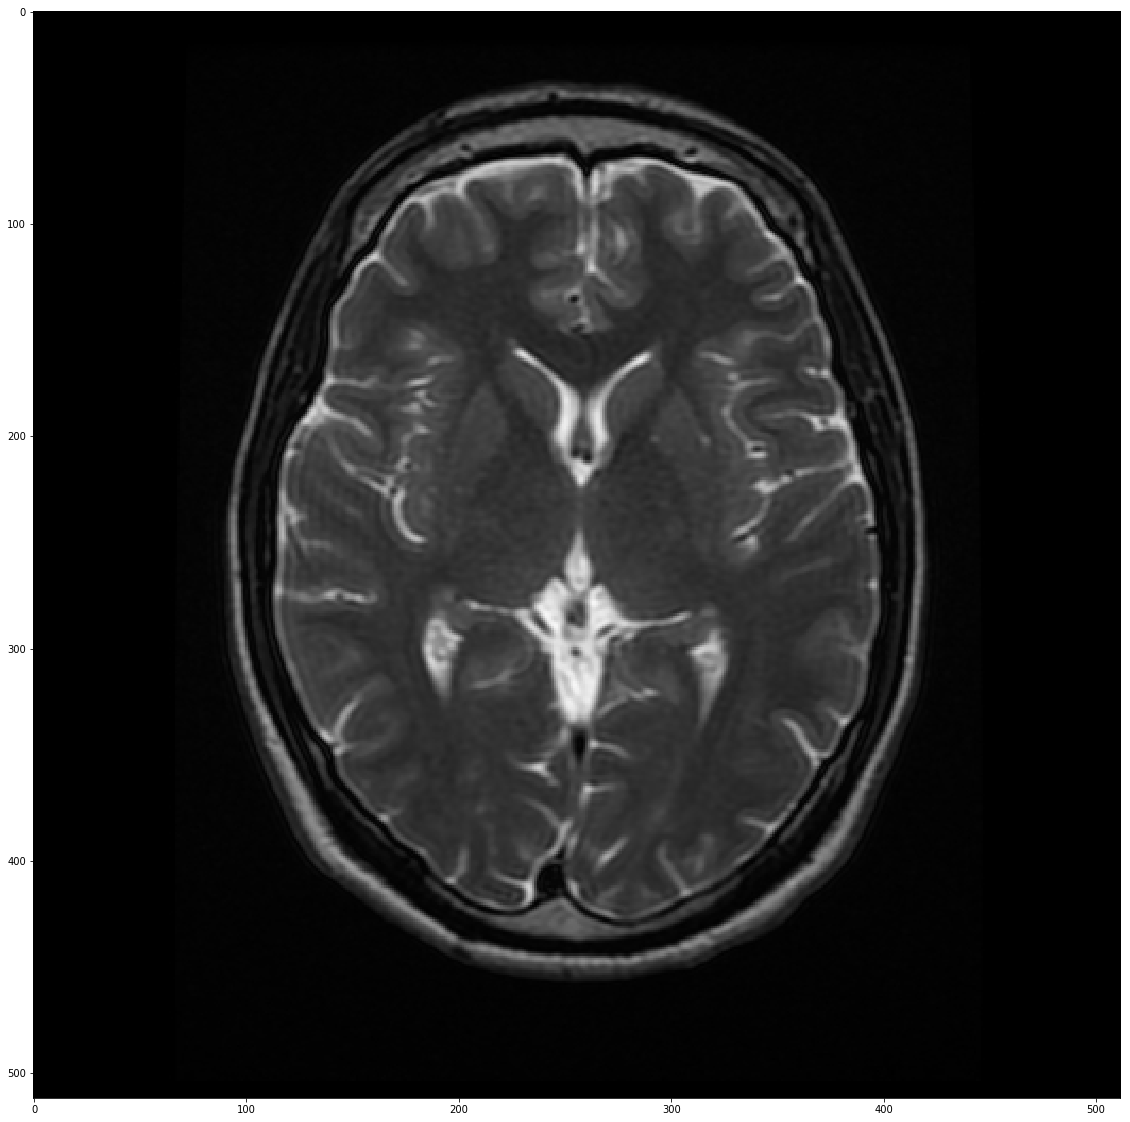

In [75]:
image = cv2.imread(data_root + 'brain_MR.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(image_copy)

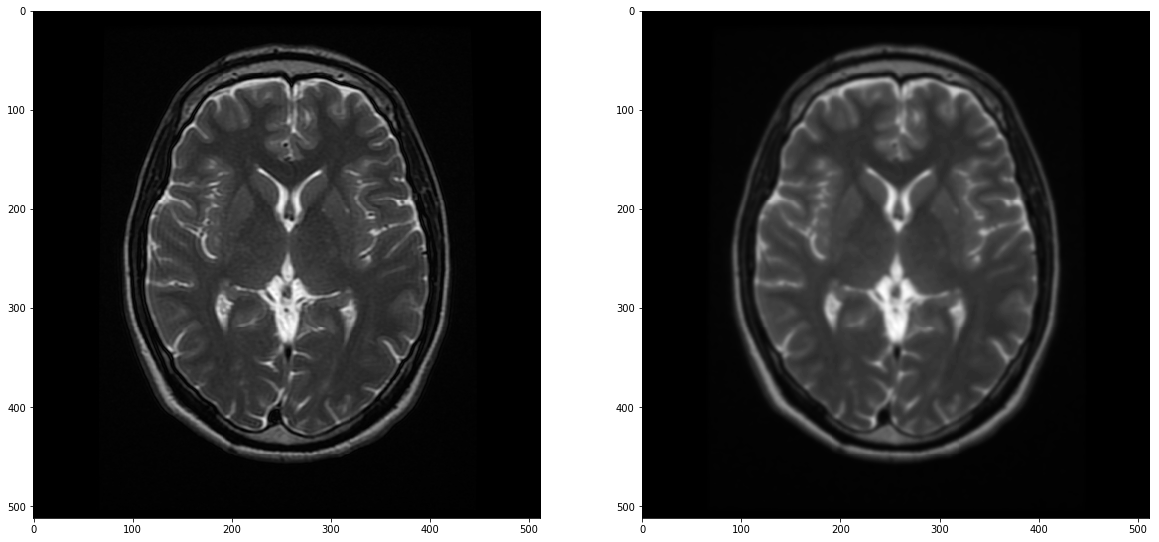

In [76]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(gray, cmap='gray')
ax2.imshow(gray_blur, cmap='gray')

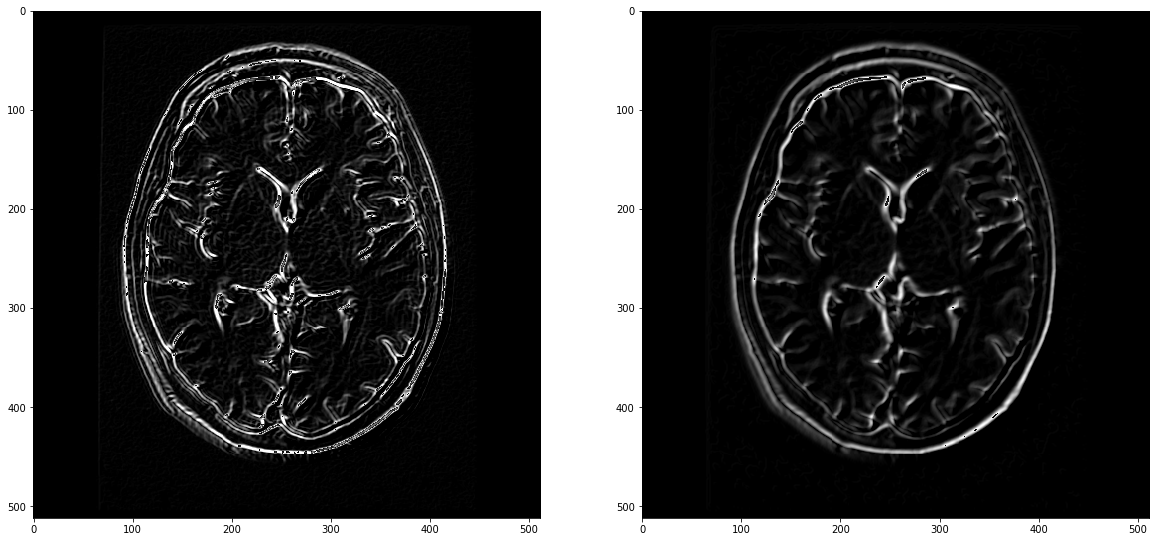

In [79]:
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

filtered_x = cv2.filter2D(gray, -1, sobel_x)
filtered_y = cv2.filter2D(gray, -1, sobel_y)
filtered = filtered_x+filtered_y

filtered_blurred_x = cv2.filter2D(gray_blur, -1, sobel_x)
filtered_blurred_y = cv2.filter2D(gray_blur, -1, sobel_y)
filtered_blurred = filtered_blurred_x + filtered_blurred_y

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(filtered_x+filtered_y, cmap='gray')
ax2.imshow(filtered_blurred_x+filtered_blurred_y, cmap='gray')

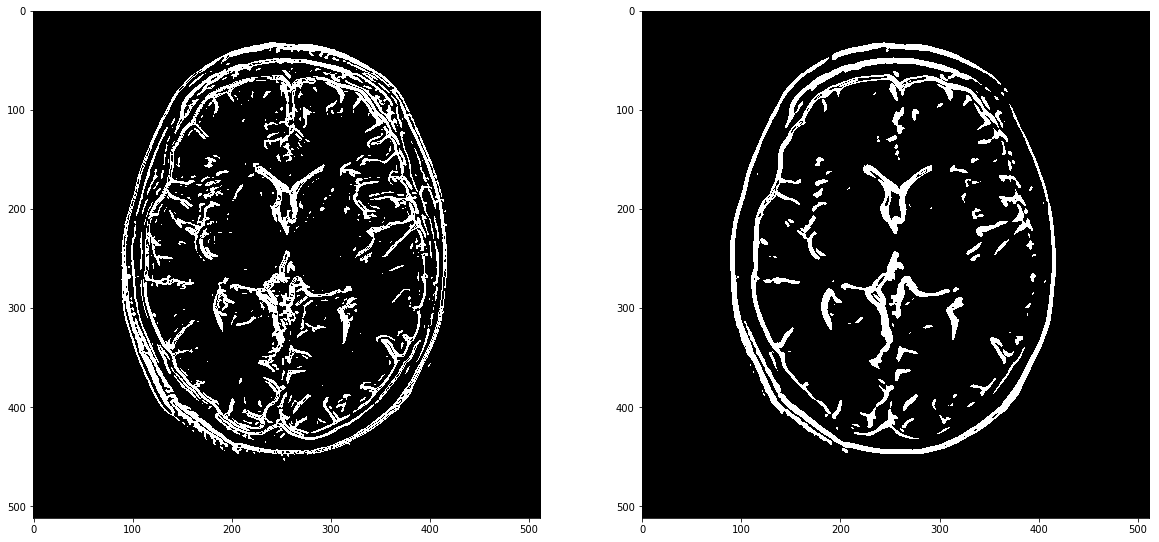

In [81]:
retval, binary_image = cv2.threshold(filtered, 50, 255, cv2.THRESH_BINARY)
retval, binary_image_blur = cv2.threshold(filtered_blurred, 50, 255, 
                                          cv2.THRESH_BINARY)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(binary_image, cmap='gray')
ax2.imshow(binary_image_blur, cmap='gray')